In [504]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append("../")
from calc_Tsys import TskySim, auto_data
from scipy.optimize import curve_fit

## Make Sure I Understand Things

Update: I don't understand things

In [505]:
def line(x, m, b):
    return m * x + b

In [514]:
n = 100000

m_scale = 1
b_scale = 1

std = 0.1

m_err = np.random.normal(scale = m_scale*std, size = n)
b_err = np.random.normal(scale = b_scale*std, size = n)

x = np.linspace(100, 200, n)

data = line(x, m_scale, b_scale)
noise = line(x, m_err, b_err)

absolute_sigma = True

p, p_cov = curve_fit(simple_line, x, data+noise, absolute_sigma=absolute_sigma)
p_err = np.sqrt(np.diag(p_cov))

X = np.column_stack([x, np.ones_like(x)])

Q_inv = np.linalg.inv(np.matmul(X.T, X))

if not absolute_sigma:
    rss = np.sum(((data+noise) - (p[0]*x+p[1]))**2)
    Q_inv *= rss / (data.shape[0] - 2)
                 
Q_mat = np.sqrt(np.diag(Q_inv))

In [515]:
print 'Actual Parameters:'
print "m = {m} +/- {m_err}".format(m=m_scale, m_err=m_scale*std)
print "b = {b} +/- {b_err}\n".format(b=b_scale, b_err=b_scale*std)

print 'Estimated Parameters:'
print "m = {m} +/- {m_err}".format(m=p[0], m_err=p_err[0])
print "b = {b} +/- {b_err}\n".format(b=p[1], b_err=p_err[1])

print 'Estimated Parameters:'
print "m = {m} +/- {m_err}".format(m=p[0], m_err=Q_mat[0])
print "b = {b} +/- {b_err}".format(b=p[1], b_err=Q_mat[1])

print np.sqrt(np.abs(p_cov[0,1]))

Actual Parameters:
m = 1 +/- 0.1
b = 1 +/- 0.1

Estimated Parameters:
m = 0.999368676204 +/- 0.000109543420423
b = 1.11381489365 +/- 0.0167330337635

Estimated Parameters:
m = 0.999368676204 +/- 0.000109543416061
b = 1.11381489365 +/- 0.0167330391757
0.0013416271808565075


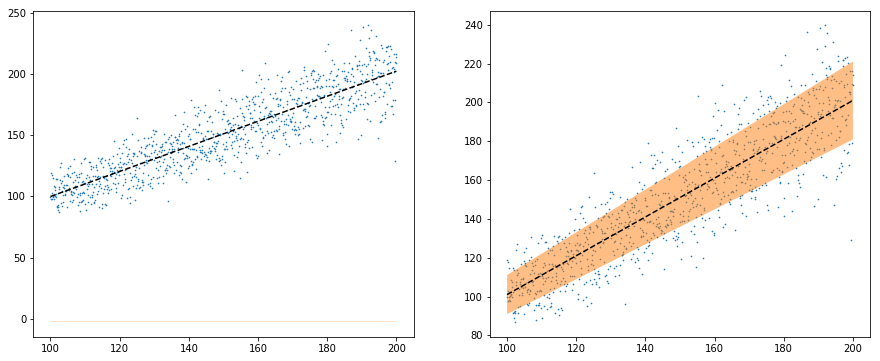

In [513]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.scatter(x, data+noise, s=0.4)
plt.plot(x, p[0]*x+p[1], 'k--')
plt.fill_between(x, p[1]-p_err.sum(), p[1]+p_err.sum(), alpha=0.5)

plt.subplot(1,2,2)
plt.scatter(x, data+noise, s=0.4)
plt.plot(x, m_scale*x+b_scale, 'k--')
plt.fill_between(x, m_scale*(1-std)*x+b_scale*(1-std), m_scale*(1+std)*x+b_scale*(1+std), alpha=0.5)


## Test Propagation

In [ ]:
hera_beam_file = '/home/shane/data/uv_beam_vivaldi.fits'

Tsky_sim = TskySim(Tsky_file = '/data4/shane/data/HERA_Tsky_vivaldi.npz', beam_file = hera_beam_file,
                  f_min=50.,f_max=250.)

In [ ]:
Tsky_sim.build_model()